In [230]:
import pandas as pd 

import matplotlib.pylab as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix


%matplotlib inline
sns.set(style='dark', color_codes=True,palette="magma")

In [231]:
df=pd.read_csv('C:\\Users\\Ekko\\Downloads\\loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [232]:
df.shape

(614, 13)

In [233]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [234]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [235]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# <span style='color:blue'> <b> Cleaning Data </b> </span>

In [236]:
#fill Credit_History & Self_Employed na values with the mode
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace=True)
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)

In [237]:
#drop na values records
df.dropna(inplace=True)

# <span style='color:blue'> <b> Correlation </b> </span>

In [238]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.107597,0.529728,-0.040014,-0.049439
CoapplicantIncome,-0.107597,1.000000,0.205801,-0.059338,0.005814
LoanAmount,0.529728,0.205801,1.000000,0.049339,-0.025290
Loan_Amount_Term,-0.040014,-0.059338,0.049339,1.000000,0.026256
Credit_History,-0.049439,0.005814,-0.025290,0.026256,1.000000


<Figure size 576x360 with 0 Axes>

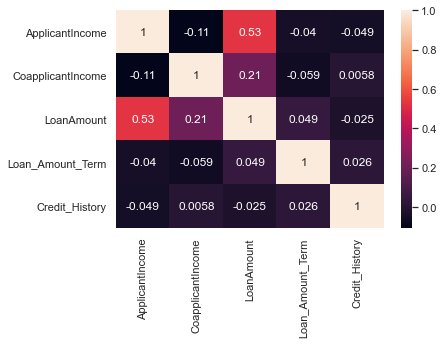

<Figure size 576x360 with 0 Axes>

In [239]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(8,5))

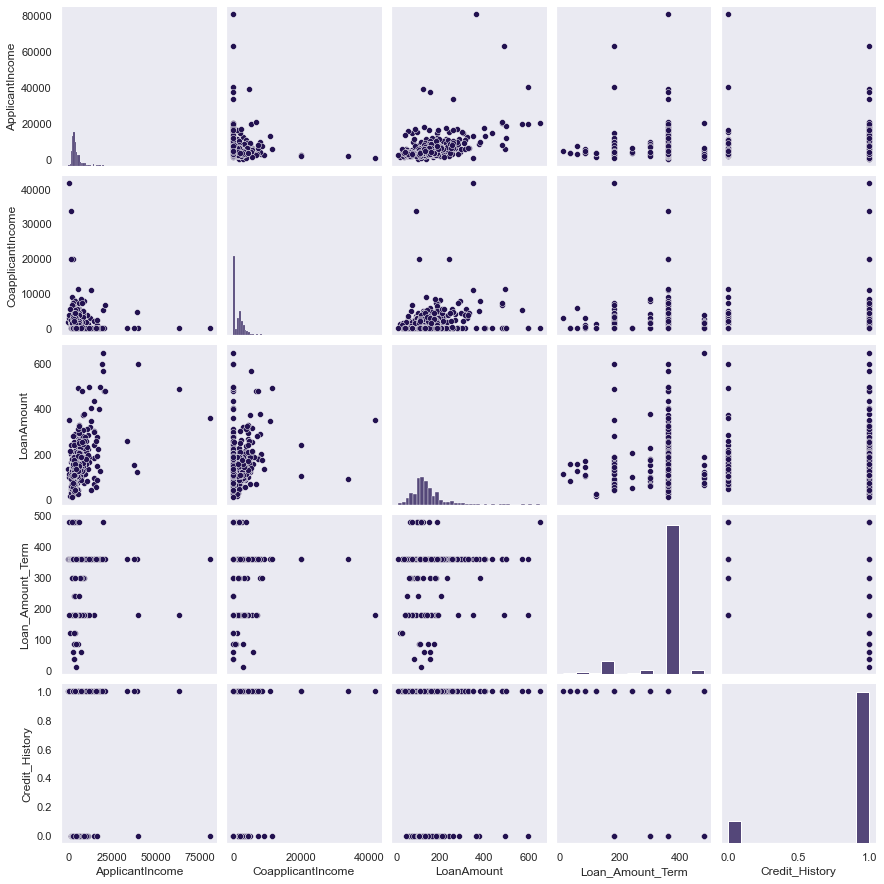

In [240]:
sns.pairplot(df)

<AxesSubplot:title={'center':'Loan_Status count values'}>

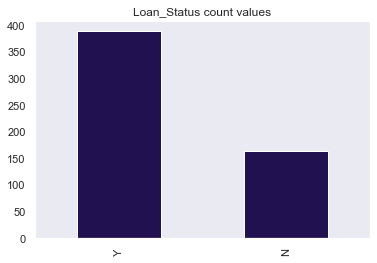

In [241]:
df.Loan_Status.value_counts().plot.bar(title='Loan_Status count values')


# <span style='color:blue'> <b> Data Analysis </b> </span>

In [242]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


###  <span style='color:#3A0C33'> <b> The percentages of acceptance loan by gender</b> </span>      

In [243]:
# the accepted loan
df_y=df[df.Loan_Status=='Y']

# total gender values
q=df.Gender.value_counts()

# total accepted loan by gender values
q2=df_y.Gender.value_counts()

print('Total Male are : {}  ,  Accepted loan : {}   ,  Accepted Percentage : {}'.format(q[0],q2[0],(q2[0]*100)/q[0]))
print('Total Female are : {}  ,  Accepted loan : {}   ,  Accepted Percentage : {}'.format(q[1],q2[1],(q2[1]*100)/q[1]))

Total Male are : 449  ,  Accepted loan : 319   ,  Accepted Percentage : 71.0467706013363
Total Female are : 104  ,  Accepted loan : 70   ,  Accepted Percentage : 67.3076923076923


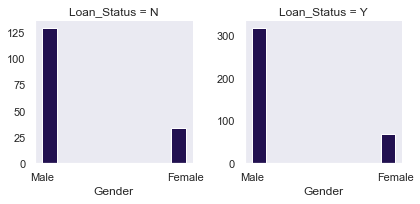

In [244]:
g = sns.FacetGrid(df, col='Loan_Status',sharey=False, sharex=False)
g.map(plt.hist, 'Gender',)

###  <span style='color:#3A0C33'> <b> The percentages of acceptance loan by Education</b> </span>      

In [245]:
# the accepted loan
df_y=df[df.Loan_Status=='Y']

# total Education values
q=df.Education.value_counts()

# total accepted loan by Education values
q2=df_y.Education.value_counts()

print('Total Graduate are : {}  ,  Accepted loan : {}   ,  Accepted Percentage : {}'.format(q[0],q2[0],(q2[0]*100)/q[0]))
print('Total Not Graduate are : {}  ,  Accepted loan : {}   ,  Accepted Percentage : {}'.format(q[1],q2[1],(q2[1]*100)/q[1]))

Total Graduate are : 437  ,  Accepted loan : 313   ,  Accepted Percentage : 71.62471395881006
Total Not Graduate are : 116  ,  Accepted loan : 76   ,  Accepted Percentage : 65.51724137931035


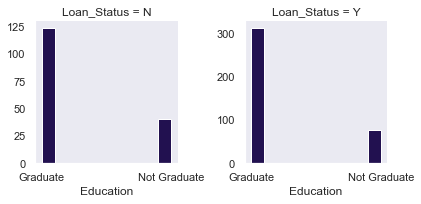

In [246]:
g = sns.FacetGrid(df, col='Loan_Status',sharey=False, sharex=False)
g.map(plt.hist, 'Education',)

###  <span style='color:#3A0C33'> <b> The most Property_Area which loan accepted </b> </span>      

Property_Area
Rural        102
Semiurban    167
Urban        120
Name: Loan_Status, dtype: int64


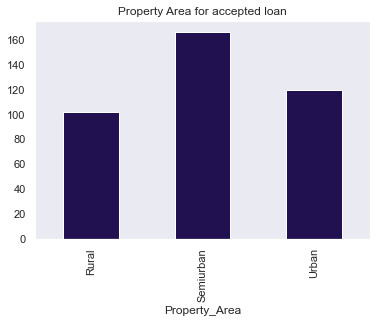

In [247]:
# the accepted loan
df_y=df[df.Loan_Status=='Y']

q=df_y.groupby('Property_Area')['Loan_Status'].count()
q.plot.bar(title='Property Area for accepted loan')

print(q)

In [248]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


###  <span style='color:#3A0C33'> <b> is there is a corr between married and who want loan </b> </span>      

In [249]:
df.groupby('Married')['Married'].count()

Married
No     194
Yes    359
Name: Married, dtype: int64

#####   <span style='color:#00003f'> <b> I think yes . Marry you are the chance for making loan is high</b> </span>      

# <span style='color:blue'> <b> Perpare the data for modeling </b> </span>

In [250]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [251]:
def Property_Area_convertor(x):
    if x == 'Semiurban' :
        return 0
    elif x == 'Urban':
        return 1
    else:
        return 2

In [252]:
def Dependents_convertor(x):
    if x == "0" :
        return 0
    elif x == "1":
        return 1
    elif x == "3":
        return 2
    else:
        return 3

In [253]:
# convert str data to numeric

df.Gender=df.Gender.apply(lambda x: 1 if x == 'Male' else  0)
df.Married=df.Married.apply(lambda x: 1 if x == 'Yes' else  0)
df.Education=df.Education.apply(lambda x: 1 if x == 'Graduate' else  0)
df.Self_Employed=df.Self_Employed.apply(lambda x: 1 if x == 'Yes' else  0)
df.Property_Area=df.Property_Area.apply(lambda x: Property_Area_convertor(x))
df.Loan_Status=df.Loan_Status.apply(lambda x: 1 if x == 'Y' else  0)
df.Dependents=df.Dependents.apply(lambda x:Dependents_convertor(x))

In [254]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,3,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [255]:
X=df.drop(['Loan_ID','Loan_Status'],axis=1)
Y=df.Loan_Status

In [256]:
#standarization
X=(X-X.mean())/X.std()

# <span style='color:blue'> <b> Model Building </b> </span>

In [257]:
#split the data to train & test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

#####   <span style='color:#00003f'> <b> perform grid search cv  </b> </span>      

In [258]:
collection = {
    

        'random_forest':{
           'model':RandomForestClassifier(),
            'params':{
                'n_estimators':[1,5,10,30,40,50]
            } 
        },
        'logistic_reg':{
            'model':LogisticRegression(solver='liblinear',multi_class='auto'),
            'params':{
                'C':[1,5,10],
            }
        },
        'knn':{
            'model':KNeighborsClassifier(),
            'params':{
                'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
            }
        },
    
    }

In [259]:
#optaining the best model
for model_name,data in collection.items() :
    clf=GridSearchCV(data['model'],data['params'],cv=5,return_train_score=False,)
    clf.fit(x_train,y_train)
    print("{},{} =>{} ".format(model_name,clf.best_params_,clf.best_score_))

random_forest,{'n_estimators': 30} =>0.7918283963227783 
logistic_reg,{'C': 1} =>0.8145301327885598 
knn,{'n_neighbors': 10} =>0.8076353421859039 


In [266]:
model = LogisticRegression(C=1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7747747747747747

# <span style='color:blue'> <b> Model Evaluation </b> </span>

<AxesSubplot:>

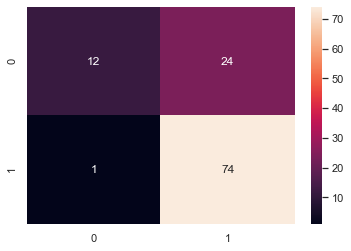

In [261]:
# confusion matrix
y_pred=model.predict(x_test)
cn=confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True)

In [262]:
# dist plot for comparing the accuracy
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.legend()
    plt.show()
    plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


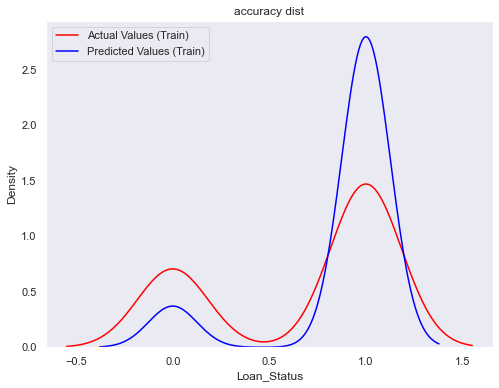

In [263]:
DistributionPlot(y_test, y_pred, "Actual Values (Train)", "Predicted Values (Train)", "accuracy dist")

In [264]:
# classification report
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.76      0.99      0.86        75

    accuracy                           0.77       111
   macro avg       0.84      0.66      0.67       111
weighted avg       0.81      0.77      0.74       111

